# Reading GIS File and Converting to NetworkX Graph

In [1]:
import networkx as nx
import geopandas as gpd
import momepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read the shapefile
shapefile_path = 'C:/Users/Sneez/Desktop/Snowplowing/Data+Info/GIS Data/OSMWithData.gpkg'
street_gdf = gpd.read_file(shapefile_path)
street_gdf.head()

,name,geom_Lengt,Jurisdicti,Shape__Len,LengthMile,Depth_in,With_EE_ft,AverageSpe,fullStreet,StreetSegm,...,PASER_Ra_3,CreationDa,PASER_Ra_4,Creator,PASER_Ra_5,EditDate,PASER_Ra_6,Editor,PASER_Ra_7,geometry
0,University Avenue,0.000117,State,1889.211956,0.357805,0.0,48.0,None,University Avenue,University Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.48609 43.08982, -89.4861..."
1,Allen Boulevard,0.000319,County,2004.510057,0.379642,5.5,54.0,None,Allen Boulevard,Allen Blvd_1,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.48609 43.08982, -89.4860..."
2,Century Avenue,0.000082,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.49026 43.10412, -89.4901..."
3,Amherst Road,0.001708,City,878.128296,0.166312,4.0,36.0,None,Amherst Road,Amherst Rd_1,...,3.0,2022-04-27,3.0,skiley_Middleton,3.0,2024-01-05,10.0,skiley_Middleton,9.0,"MULTILINESTRING ((-89.49026 43.10412, -89.4902..."
4,Century Avenue,0.002431,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.49026 43.10412, -89.4905..."


Check if the widths of streets vary at all

In [3]:
widths = dict()
for i in range(0, len(street_gdf)):
    name = street_gdf['fullStreet'][i]
    width = street_gdf['With_EE_ft'][i]
    if name in widths:
        widths[name].add(width)
    else:
        widths[name] = {width}

# print out all items in dictionary
for name in widths:
    if len(widths[name]) > 1 and name is not None:
        print(name, widths[name])

In [4]:
street_gdf['abvPostTyp'].unique()

array(['Ave', 'Blvd', 'Rd', None, 'Way', 'Ln', 'Dr', 'Trl', 'Plz', 'St',
       'Ct', 'Cir', 'Pl', 'Pass', 'Loop', 'Ter', 'Pkwy', 'Run', 'Walk',
       'Grn', 'Hl'], dtype=object)

In [5]:
street_gdf.columns

Index(['name', 'geom_Lengt', 'Jurisdicti', 'Shape__Len', 'LengthMile',
       'Depth_in', 'With_EE_ft', 'AverageSpe', 'fullStreet', 'StreetSegm',
       'FromName', 'ToName', 'Shape__Len_2', 'LengthMile_2', 'Depth_in_2',
       'With_EE_ft_2', 'ROW_ft', 'PASER_Rati', 'RdCode', 'Jurisdicti_2',
       'YearComple', 'ProjectNum', 'ProjectNam', 'SurfaceMat', 'AADT',
       'ADTMonthYe', 'AverageSpe_2', 'YearSpeedC', 'CG_Type_Ev', 'CG_Type_Od',
       'CG_Width_f', 'CG_Width_1', 'T_Width_ft', 'T_Width__1', 'Sidewalk_L',
       'Sidewalk_W', 'StreetSe_1', 'abvStreetN', 'abvPreDire', 'abvPreType',
       'abvPostTyp', 'abvPostDir', 'Maintained', 'TrafficDir', 'SpeedDir',
       'Class_MPO_', 'Culdesac_R', 'Type', 'BaseMateri', 'DeveloperN',
       'preType', 'BaseName', 'postType', 'postDirect', 'Circle_YN',
       'PASER_Ra_1', 'PASER_Ra_2', 'GlobalID', 'PASER_Ra_3', 'CreationDa',
       'PASER_Ra_4', 'Creator', 'PASER_Ra_5', 'EditDate', 'PASER_Ra_6',
       'Editor', 'PASER_Ra_7', 'geometry

<Axes: >

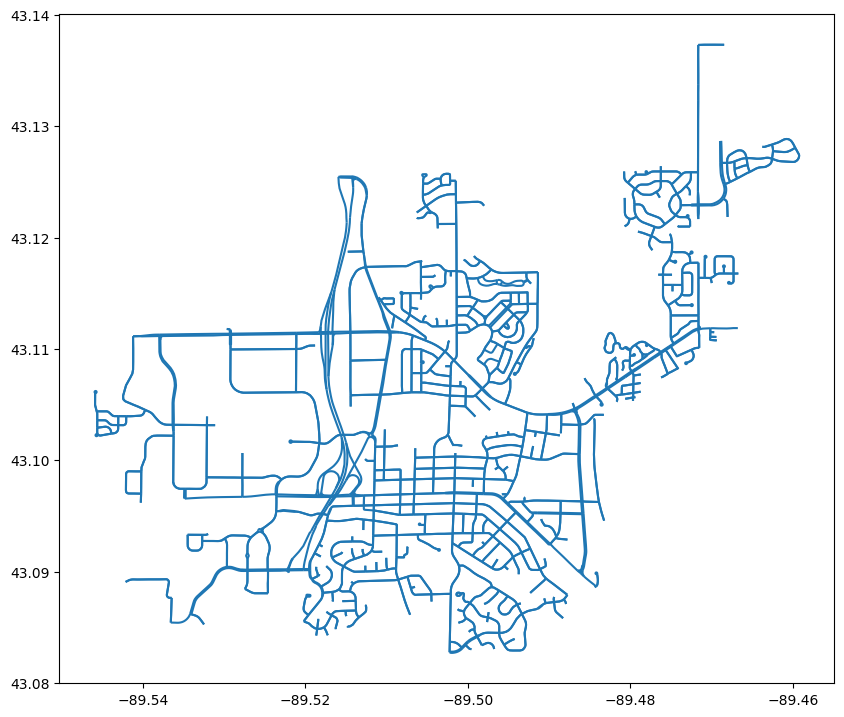

In [6]:
street_gdf.plot(figsize=(10,10))

In [7]:
gdf = street_gdf.explode()
gdf

C:\Users\Sneez\AppData\Local\Temp\ipykernel_27672\3522184714.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf = street_gdf.explode()


,,name,geom_Lengt,Jurisdicti,Shape__Len,LengthMile,Depth_in,With_EE_ft,AverageSpe,fullStreet,StreetSegm,...,PASER_Ra_3,CreationDa,PASER_Ra_4,Creator,PASER_Ra_5,EditDate,PASER_Ra_6,Editor,PASER_Ra_7,geometry
0,0,University Avenue,0.000117,State,1889.211956,0.357805,0.0,48.0,None,University Avenue,University Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.48609 43.08982, -89.48619 43.0..."
1,0,Allen Boulevard,0.000319,County,2004.510057,0.379642,5.5,54.0,None,Allen Boulevard,Allen Blvd_1,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.48609 43.08982, -89.48604 43.0..."
2,0,Century Avenue,0.000082,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.49026 43.10412, -89.49018 43.1..."
3,0,Amherst Road,0.001708,City,878.128296,0.166312,4.0,36.0,None,Amherst Road,Amherst Rd_1,...,3.0,2022-04-27,3.0,skiley_Middleton,3.0,2024-01-05,10.0,skiley_Middleton,9.0,"LINESTRING (-89.49026 43.10412, -89.49026 43.1..."
4,0,Century Avenue,0.002431,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.49026 43.10412, -89.49056 43.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,Evergreen Road,0.008853,City,1095.668337,0.207513,5.0,32.0,None,Evergreen Road,Evergreen Rd_1,...,9.0,2022-04-27,7.0,skiley_Middleton,7.0,2024-01-05,7.0,skiley_Middleton,7.0,"LINESTRING (-89.54120 43.11113, -89.54120 43.1..."
1937,0,Airport Road,0.000841,City,894.248645,0.169365,4.0,52.0,None,Airport Road,Airport Rd_1,...,8.0,2022-04-27,8.0,skiley_Middleton,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"LINESTRING (-89.54036 43.11115, -89.54120 43.1..."
1938,0,Airport Road,0.002381,City,894.248645,0.169365,4.0,52.0,None,Airport Road,Airport Rd_1,...,8.0,2022-04-27,8.0,skiley_Middleton,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"LINESTRING (-89.54036 43.11115, -89.54012 43.1..."
1939,0,Pleasant View Road,0.000151,City,85.208730,0.016138,3.0,23.0,None,Pleasant View Road,Pleasant View Rd_1,...,5.0,2022-04-27,5.0,skiley_Middleton,7.0,2024-01-05,7.0,skiley_Middleton,7.0,"LINESTRING (-89.53792 43.11129, -89.53798 43.1..."


In [8]:
G_primal = momepy.gdf_to_nx(gdf, approach='primal', directed=True)

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


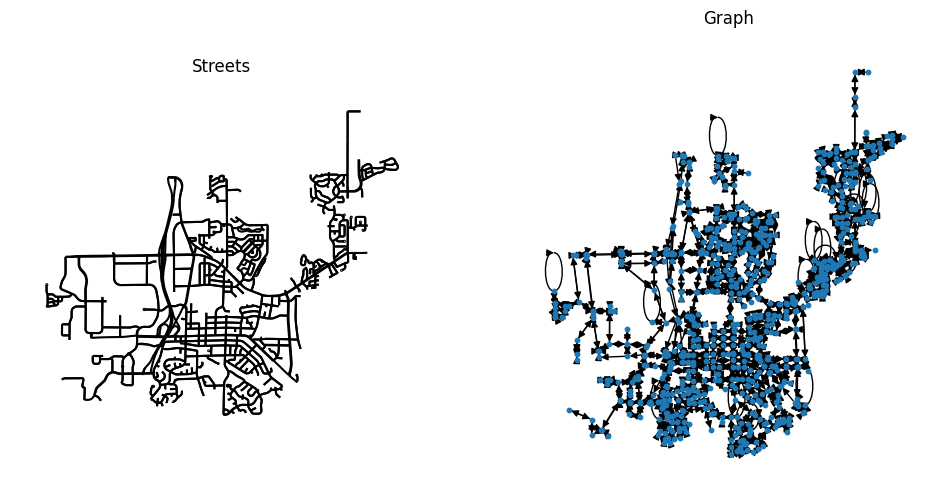

In [9]:
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
nx.draw(G_primal, {n: [n[0], n[1]] for n in list(G_primal.nodes)}, ax=ax[1], node_size=10)

In [10]:
print(G_primal)
print(nx.is_strongly_connected(G_primal))
print(nx.is_connected(G_primal.to_undirected()))

MultiDiGraph with 813 nodes and 1941 edges
False


True


In [11]:
scc = list(nx.strongly_connected_components(G_primal))
for i in scc:
    print(len(i))

1
1
6
1
3
793
1
1
1
1
3
1


To make connected, consider exploring algorithms to identify strongly connected components. Small one off nodes that aren't strongly connected. We could discard or modify them

## Get OSM Data for attributes like road type and max speed

In [12]:
G_osm = ox.graph_from_place('Middleton, Wisconsin', network_type='drive')
G_osm = ox.add_edge_speeds(G_osm)
G_osm = ox.add_edge_travel_times(G_osm)


In [13]:
nodes, edges = momepy.nx_to_gdf(G_osm, points=True, lines=True)
edges.head()

C:\Users\Sneez\AppData\Local\Temp\ipykernel_27672\24756734.py:1: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes, edges = momepy.nx_to_gdf(G_osm, points=True, lines=True)


,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,speed_kph,travel_time,geometry,bridge,junction,access,node_start,node_end
0,871134221,True,2,CTH MS,University Avenue,primary,35 mph,False,10.805,56.3,0.7,None,NaN,NaN,NaN,0,514
1,"[700703012, 871134222]",True,2,NaN,Allen Boulevard,secondary,NaN,False,32.204,52.6,2.2,"LINESTRING (-89.48609 43.08982, -89.48604 43.0...",NaN,NaN,NaN,0,694
2,178715043,False,4,CTH M,Century Avenue,secondary,30 mph,False,6.678,48.3,0.5,None,NaN,NaN,NaN,1,755
3,6654382,False,NaN,NaN,Amherst Road,residential,NaN,True,189.262,42.4,16.1,"LINESTRING (-89.49026 43.10412, -89.49026 43.1...",NaN,NaN,NaN,1,91
4,178715043,False,4,CTH M,Century Avenue,secondary,30 mph,True,198.241,48.3,14.8,"LINESTRING (-89.49026 43.10412, -89.49056 43.1...",NaN,NaN,NaN,1,577


Add roadtype and maxspeed to main dataframe

In [14]:
print(len(gdf))
print(len(edges))

1941
1941


In [22]:
gdf['roadtype'] = list(edges['highway'])
gdf['travel_time'] = list(edges['travel_time'])
gdf['lanes'] = list(edges['lanes'])
gdf

,,name,geom_Lengt,Jurisdicti,Shape__Len,LengthMile,Depth_in,With_EE_ft,AverageSpe,fullStreet,StreetSegm,...,PASER_Ra_5,EditDate,PASER_Ra_6,Editor,PASER_Ra_7,geometry,roadtype,speedlimit,lanes,travel_time
0,0,University Avenue,0.000117,State,1889.211956,0.357805,0.0,48.0,None,University Avenue,University Ave_01,...,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.48609 43.08982, -89.48619 43.0...",primary,35 mph,2,0.7
1,0,Allen Boulevard,0.000319,County,2004.510057,0.379642,5.5,54.0,None,Allen Boulevard,Allen Blvd_1,...,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.48609 43.08982, -89.48604 43.0...",secondary,NaN,2,2.2
2,0,Century Avenue,0.000082,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.49026 43.10412, -89.49018 43.1...",secondary,30 mph,4,0.5
3,0,Amherst Road,0.001708,City,878.128296,0.166312,4.0,36.0,None,Amherst Road,Amherst Rd_1,...,3.0,2024-01-05,10.0,skiley_Middleton,9.0,"LINESTRING (-89.49026 43.10412, -89.49026 43.1...",residential,NaN,NaN,16.1
4,0,Century Avenue,0.002431,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (-89.49026 43.10412, -89.49056 43.1...",secondary,30 mph,4,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,Evergreen Road,0.008853,City,1095.668337,0.207513,5.0,32.0,None,Evergreen Road,Evergreen Rd_1,...,7.0,2024-01-05,7.0,skiley_Middleton,7.0,"LINESTRING (-89.54120 43.11113, -89.54120 43.1...",residential,NaN,NaN,75.9
1937,0,Airport Road,0.000841,City,894.248645,0.169365,4.0,52.0,None,Airport Road,Airport Rd_1,...,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"LINESTRING (-89.54036 43.11115, -89.54120 43.1...",tertiary,NaN,NaN,5.7
1938,0,Airport Road,0.002381,City,894.248645,0.169365,4.0,52.0,None,Airport Road,Airport Rd_1,...,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"LINESTRING (-89.54036 43.11115, -89.54012 43.1...",tertiary,NaN,NaN,16.1
1939,0,Pleasant View Road,0.000151,City,85.208730,0.016138,3.0,23.0,None,Pleasant View Road,Pleasant View Rd_1,...,7.0,2024-01-05,7.0,skiley_Middleton,7.0,"LINESTRING (-89.53792 43.11129, -89.53798 43.1...",tertiary,NaN,NaN,1.3


In [23]:
gdf.columns

Index(['name', 'geom_Lengt', 'Jurisdicti', 'Shape__Len', 'LengthMile',
       'Depth_in', 'With_EE_ft', 'AverageSpe', 'fullStreet', 'StreetSegm',
       'FromName', 'ToName', 'Shape__Len_2', 'LengthMile_2', 'Depth_in_2',
       'With_EE_ft_2', 'ROW_ft', 'PASER_Rati', 'RdCode', 'Jurisdicti_2',
       'YearComple', 'ProjectNum', 'ProjectNam', 'SurfaceMat', 'AADT',
       'ADTMonthYe', 'AverageSpe_2', 'YearSpeedC', 'CG_Type_Ev', 'CG_Type_Od',
       'CG_Width_f', 'CG_Width_1', 'T_Width_ft', 'T_Width__1', 'Sidewalk_L',
       'Sidewalk_W', 'StreetSe_1', 'abvStreetN', 'abvPreDire', 'abvPreType',
       'abvPostTyp', 'abvPostDir', 'Maintained', 'TrafficDir', 'SpeedDir',
       'Class_MPO_', 'Culdesac_R', 'Type', 'BaseMateri', 'DeveloperN',
       'preType', 'BaseName', 'postType', 'postDirect', 'Circle_YN',
       'PASER_Ra_1', 'PASER_Ra_2', 'GlobalID', 'PASER_Ra_3', 'CreationDa',
       'PASER_Ra_4', 'Creator', 'PASER_Ra_5', 'EditDate', 'PASER_Ra_6',
       'Editor', 'PASER_Ra_7', 'geometry

In [24]:
G_final_primal = momepy.gdf_to_nx(gdf, approach='primal', directed=True)
print(G_final_primal)

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


MultiDiGraph with 813 nodes and 1941 edges


In [25]:
G_dual = momepy.gdf_to_nx(gdf, approach='dual')

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:99: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  sw = libpysal.weights.Queen.from_dataframe(gdf_network, silence_warnings=True)


c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = gdf_network.geometry.centroid


Plot the dual graph

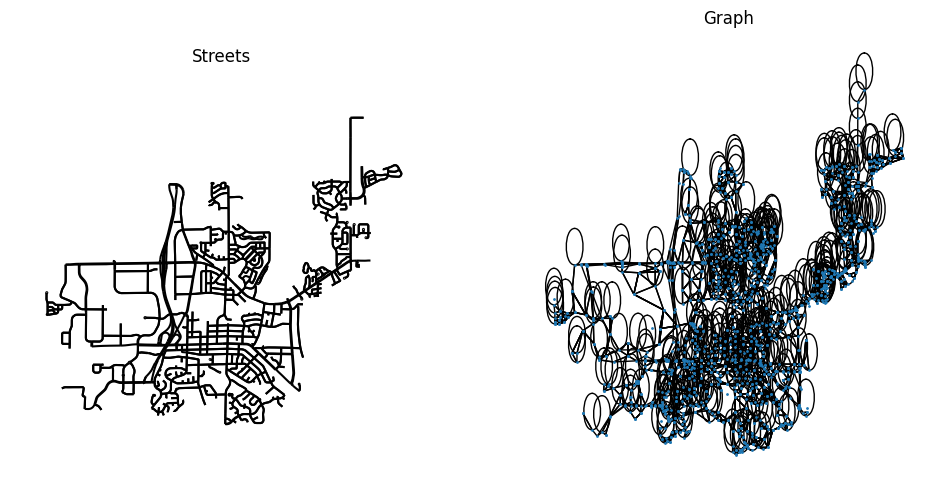

In [26]:
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
nx.draw(G_dual, {n: [n[0], n[1]] for n in list(G_dual.nodes)}, ax=ax[1], node_size=1)
plt.show()

In [27]:
print(G_dual)
print(nx.is_connected(G_dual))

MultiGraph with 1573 nodes and 5378 edges
False


In [28]:
G_dual_nonmulti = nx.Graph(G_dual)
print(G_dual_nonmulti)
for edge in G_dual.edges(data=True):
    print(edge)

Graph with 1573 nodes and 5378 edges
((-89.48613974999998, 43.08985275000006), (-89.48635270831704, 43.08998665035928), {'angle': 3.406802354962849})
((-89.48613974999998, 43.08985275000006), (-89.48599112636009, 43.0899426943148), {'angle': 87.00557968232124})
((-89.48613974999998, 43.08985275000006), (-89.48597581512999, 43.09021461584868), {'angle': 81.40081306652053})
((-89.48613974999998, 43.08985275000006), (-89.48589954999997, 43.08969145000006), {'angle': 1.0662345714757748})
((-89.48635270831704, 43.08998665035928), (-89.48612583498003, 43.09025250069102), {'angle': 112.18596241861405})
((-89.48635270831704, 43.08998665035928), (-89.48597581512999, 43.09021461584868), {'angle': 95.19238457851662})
((-89.48635270831704, 43.08998665035928), (-89.48820163515528, 43.091279169270344), {'angle': 4.247482894671947})
((-89.48599112636009, 43.0899426943148), (-89.48559999205635, 43.092596249738584), {'angle': 36.21527224929048})
((-89.48599112636009, 43.0899426943148), (-89.48584269787